# Aprendizado de máquina com o scikit-learn - COVID 19 - ANÁLISE EXPLORATÓRIA

*
   * Tipos de aprendizado de máquina
* Divisão de teste e treino
* Usando `sklearn` para criar modelo de regressão linear
* Codificação One-Hot
* Pipelines
* Métricas de avaliação

Analise de dados COVID-19 dos Estados Unidos do New York Times em https://github.com/nytimes/covid-19-data

** Isenção de responsabilidade: a regressão linear não é o algoritmo mais adequado para este conjunto de dados, mas estamos usando-o para ilustrar como usar o scikit-learn **

Hoje vamos começar de maneira simples e focar em um problema de aprendizado supervisionado (regressão). 
Aqui, usaremos um modelo de regressão linear para prever o número de mortes resultantes do COVID-19.

In [0]:
%fs ls databricks-datasets/COVID/covid-19-data/us-states.csv

path,name,size
dbfs:/databricks-datasets/COVID/covid-19-data/us-states.csv,us-states.csv,703102


In [0]:
import pandas as pd

df = pd.read_csv("/dbfs/databricks-datasets/COVID/covid-19-data/us-states.csv")
df.head()
#df.date.max()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [0]:
df.shape

Out[2]: (20584, 5)

In [0]:
display(df)

date,state,fips,cases,deaths
2020-01-21,Washington,53,1,0
2020-01-22,Washington,53,1,0
2020-01-23,Washington,53,1,0
2020-01-24,Illinois,17,1,0
2020-01-24,Washington,53,1,0
2020-01-25,California,6,1,0
2020-01-25,Illinois,17,1,0
2020-01-25,Washington,53,1,0
2020-01-26,Arizona,4,1,0
2020-01-26,California,6,2,0


## Relação entre Casos e Mortes

In [0]:
# Para nos permitir imprimir plotagens
%matplotlib inline

%matplotlib inline is not supported in Databricks.
You can display matplotlib figures using display(). For an example, see https://docs.databricks.com/user-guide/visualizations/matplotlib-and-ggplot.html

In [0]:
# Filter to 2020-05-01
df_05_01 = df[df["date"] == "2020-05-01"]

ax = df_05_01.plot(x="cases", y="deaths", kind="scatter", 
                   figsize=(12,8), s=100, title="Deaths vs Cases on 2020-05-01 - All States")

df_05_01[["cases", "deaths", "state"]].apply(lambda row: ax.text(*row), axis=1);

display(df_05_01)

date,state,fips,cases,deaths
2020-05-01,Alabama,1,7294,289
2020-05-01,Alaska,2,362,7
2020-05-01,Arizona,4,7962,330
2020-05-01,Arkansas,5,3310,64
2020-05-01,California,6,52318,2147
2020-05-01,Colorado,8,15661,818
2020-05-01,Connecticut,9,28764,2339
2020-05-01,Delaware,10,4918,159
2020-05-01,District of Columbia,11,4658,231
2020-05-01,Florida,12,34720,1313


## Nova York e Nova Jersey são outliers

In [0]:
# Filter to states that are NOT New York and NOT New Jersey
not_ny = df[(df["state"] != "New York") & (df["state"] != "New Jersey")]
not_ny.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [0]:
# Filter to 2020-05-01
not_ny_05_01 = not_ny[not_ny["date"] == "2020-05-01"]

ax = not_ny_05_01.plot(x="cases", y="deaths", kind="scatter", 
                   figsize=(12,8), s=50, title="Deaths vs Cases on 2020-05-01 - All States but NY and NJ")

not_ny_05_01[["cases", "deaths", "state"]].apply(lambda row: ax.text(*row), axis=1);

In [0]:
display(not_ny_05_01)

date,state,fips,cases,deaths
2020-05-01,Alabama,1,7294,289
2020-05-01,Alaska,2,362,7
2020-05-01,Arizona,4,7962,330
2020-05-01,Arkansas,5,3310,64
2020-05-01,California,6,52318,2147
2020-05-01,Colorado,8,15661,818
2020-05-01,Connecticut,9,28764,2339
2020-05-01,Delaware,10,4918,159
2020-05-01,District of Columbia,11,4658,231
2020-05-01,Florida,12,34720,1313


## Comparação de mortes entre Nova York e Califórnia COVID-19

In [0]:
df_ny_cali = df[(df["state"] == "New York") | (df["state"] == "California")]

# Let's pivot our df_ny_cali DataFrame so that we can plot deaths over time for both states
df_ny_cali_pivot = df_ny_cali.pivot(index='date', columns='state', values='deaths').fillna(0)
df_ny_cali_pivot.head()

state,California,New York
date,,
2020-01-25,0.0,0.0
2020-01-26,0.0,0.0
2020-01-27,0.0,0.0
2020-01-28,0.0,0.0
2020-01-29,0.0,0.0


In [0]:
display(df_ny_cali_pivot)

California,New York
0.0,0.0
0.0,0.0
0.0,0.0
0.0,0.0
0.0,0.0
0.0,0.0
0.0,0.0
0.0,0.0
0.0,0.0
0.0,0.0


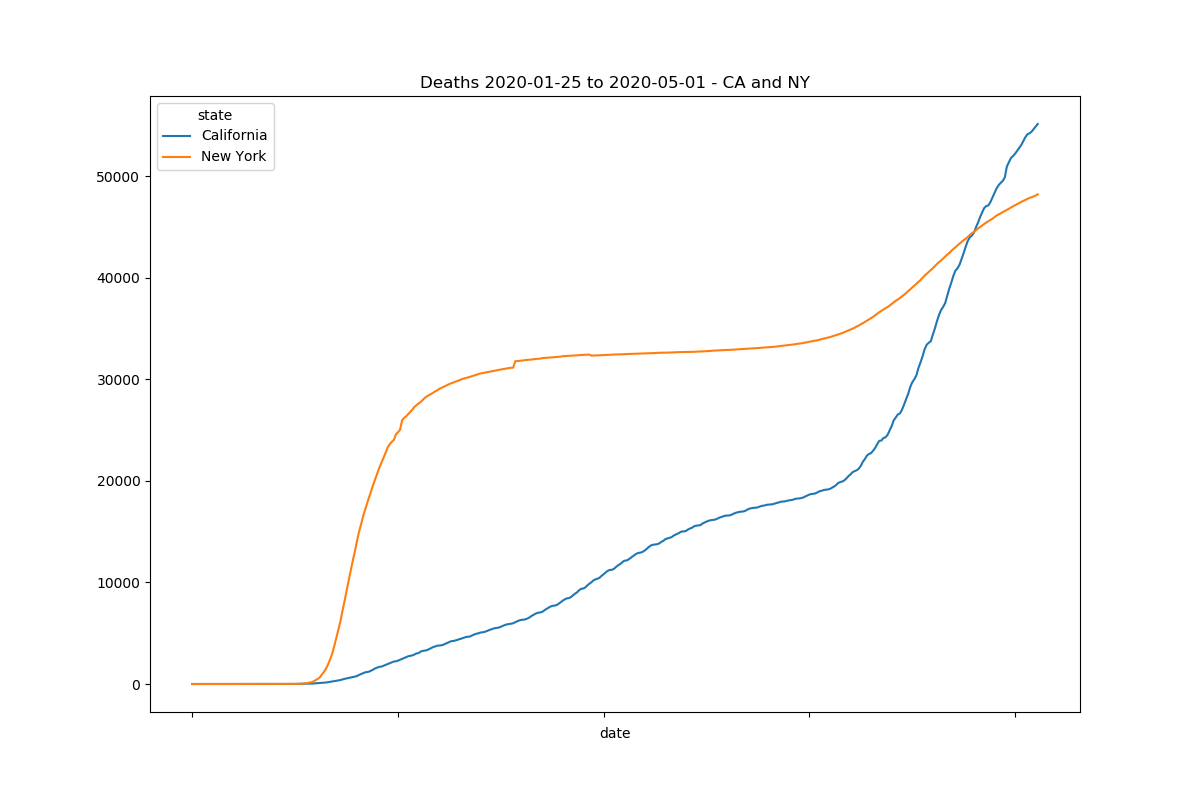

In [0]:
df_ny_cali_pivot.plot.line(title="Deaths 2020-01-25 to 2020-05-01 - CA and NY", figsize=(12,8))
display()

## Train-Test Split

![](https://brookewenig.com/img/IntroML/trainTest.png)

182/5000
Como se trata de dados temporais, em vez de fazer uma divisão aleatória, usaremos os dados de 1º de março a 7 de abril para treinar nosso modelo e testá-lo prevendo valores de 8 a 14 de abril.

In [0]:
train_df = df[(df["date"] >= "2020-03-01") & (df["date"] <= "2020-04-07")]
test_df = df[df["date"] > "2020-04-07"]

X_train = train_df[["cases"]]
y_train = train_df["deaths"]

X_test = test_df[["cases"]]
y_test = test_df["deaths"]

In [0]:
train_df.head()

,date,state,fips,cases,deaths
240,2020-03-01,Arizona,4,1,0
241,2020-03-01,California,6,33,0
242,2020-03-01,Florida,12,2,0
243,2020-03-01,Illinois,17,3,0
244,2020-03-01,Massachusetts,25,1,0


## Linear Regression

* Goal: Find the line of best fit
$$\hat{y} = w_0 + w_1x$$

$$\{y} ≈ \hat{y} + ϵ$$
* *x*: feature
* *y*: label

![](https://miro.medium.com/max/640/1*LEmBCYAttxS6uI6rEyPLMQ.png)

Aqui, ajustaremos um modelo de regressão linear do scikit-learn.

In [0]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=False).fit(X_train, y_train)
#print(f'num_deaths = (lr.coef_[0]:.4f)* cases')
print(f"num_deaths = {lr.coef_[0]:.4f}*cases")


num_deaths = 0.0355*cases

Portanto, este modelo está implicando que há uma taxa de mortalidade de 2,9% em nosso conjunto de dados. Mas sabemos que alguns estados têm taxas de mortalidade mais altas do que outros. Vamos incluir o estado como um recurso!

## One-Hot Encoding
Como lidamos com recursos não numéricos, como o estado?

Uma ideia:
* Crie um recurso numérico único para representar um não numérico
* Recursos categóricos:
   * state = {'Nova York', 'Califórnia', 'Louisiana'}
   * 'Nova York' = 1, 'Califórnia' = 2, 'Louisiana' = 3
  
MAS isso implica que a Califórnia é 2x Nova York!

Melhor ideia:
* Crie um recurso "fictício" para cada categoria
* 'Nova York' => [1, 0, 0], 'Califórnia' => [0, 1, 0], 'Louisiana' => [0, 0, 1]

Essa técnica é conhecida como ["One Hot Encoding"] (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [0]:
from sklearn.preprocessing import OneHotEncoder

X_train = train_df[["cases", "state"]]
X_test = test_df[["cases", "state"]]

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
enc.fit(X_train).transform(X_train)

Out[15]: array([[1., 0., 0., ..., 0., 0., 0.],
 [0., 0., 0., ..., 0., 0., 0.],
 [0., 1., 0., ..., 0., 0., 0.],
 ...,
 [0., 0., 0., ..., 1., 0., 0.],
 [0., 0., 0., ..., 0., 1., 0.],
 [0., 0., 0., ..., 0., 0., 1.]])

Vamos verificar o shape

In [0]:
enc.fit(X_train).transform(X_train).shape

Out[16]: (1754, 915)

Caramba! Ele codificou a variável cases também

In [0]:
enc.categories_

Out[17]: [array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
 104, 105, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116, 118,
 119, 120, 121, 122, 123, 124, 126, 127, 128, 129, 130, 131, 132,
 133, 134, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
 147, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162,
 164, 165, 166, 167, 168, 169, 171, 172, 173, 174, 175, 176, 177,
 179, 182, 183, 184, 185, 186, 187, 189, 190, 191, 193, 194, 195,
 196, 197, 198, 199, 200, 201, 202, 203, 204, 207, 209, 210, 211,
 212, 213, 214, 216, 217, 218, 219, 221, 223, 224, 225, 231, 232,
 234, 235, 236, 237, 239, 240, 241, 242, 245, 247, 248, 249, 252,
 253, 254, 255, 256, 257, 258, 262, 264, 265, 266, 267, 268, 269,
 272, 273, 274, 275, 278, 279, 280, 281, 282, 283, 286, 288, 289,
 290, 291, 293, 294, 297, 298, 299, 302, 303, 304, 307, 310, 312,
 314, 315, 316, 317, 319, 320, 321, 322, 325, 326, 327, 328, 333,
 334, 336, 338, 339, 342, 344, 346, 347, 349, 350, 351, 363, 364,
 367, 368, 369, 371, 374, 376, 377, 378, 381, 382, 384, 385, 386,
 388, 389, 390, 392, 393, 394, 397, 398, 401, 402, 403, 405, 408,
 409, 413, 415, 418, 419, 420, 421, 423, 424, 425, 427, 429, 432,
 434, 435, 438, 439, 442, 444, 449, 450, 452, 456, 461, 470, 475,
 478, 479, 480, 481, 482, 484, 486, 488, 489, 491, 495, 498, 499,
 504, 508, 511, 512, 513, 519, 522, 525, 526, 535, 537, 538, 540,
 542, 543, 544, 547, 548, 549, 552, 554, 562, 564, 566, 573, 575,
 576, 579, 581, 583, 586, 588, 590, 591, 593, 603, 605, 607, 608,
 609, 610, 614, 618, 620, 621, 623, 624, 625, 629, 639, 644, 646,
 653, 657, 661, 665, 669, 670, 673, 674, 675, 678, 683, 686, 689,
 690, 699, 702, 707, 711, 715, 719, 720, 721, 728, 732, 735, 737,
 738, 739, 742, 743, 747, 751, 754, 757, 759, 762, 763, 764, 769,
 773, 775, 777, 783, 784, 786, 787, 789, 790, 794, 800, 806, 827,
 830, 837, 848, 851, 853, 854, 857, 865, 867, 868, 875, 879, 887,
 889, 891, 893, 896, 899, 902, 905, 908, 909, 912, 920, 922, 925,
 927, 928, 930, 935, 937, 946, 947, 950, 972, 981, 986, 989, 992,
 997, 998, 999, 1000, 1012, 1020, 1026, 1033, 1042, 1044, 1047,
 1048, 1049, 1057, 1066, 1067, 1068, 1069, 1073, 1076, 1077, 1082,
 1083, 1086, 1095, 1097, 1100, 1108, 1113, 1120, 1132, 1144, 1151,
 1159, 1166, 1169, 1170, 1172, 1177, 1180, 1181, 1210, 1211, 1222,
 1228, 1229, 1239, 1244, 1248, 1249, 1251, 1269, 1270, 1279, 1283,
 1285, 1289, 1291, 1293, 1298, 1303, 1324, 1326, 1336, 1350, 1351,
 1358, 1363, 1375, 1385, 1388, 1404, 1406, 1413, 1415, 1426, 1432,
 1455, 1458, 1467, 1470, 1511, 1522, 1524, 1527, 1535, 1542, 1544,
 1549, 1552, 1554, 1569, 1580, 1591, 1600, 1618, 1632, 1638, 1641,
 1655, 1662, 1665, 1690, 1700, 1706, 1721, 1730, 1735, 1737, 1738,
 1758, 1769, 1791, 1795, 1797, 1834, 1838, 1840, 1844, 1851, 1858,
 1874, 1880, 1914, 1915, 1916, 1917, 1933, 1971, 1985, 1993, 2005,
 2011, 2019, 2049, 2061, 2093, 2101, 2112, 2113, 2177, 2197, 2198,
 2199, 2217, 2232, 2240, 2267, 2269, 2291, 2293, 2305, 2315, 2331,
 2367, 2381, 2387, 2402, 2408, 2417, 2440, 2447, 2466, 2469, 2478,
 2538, 2548, 2571, 2577, 2578, 2585, 2628, 2636, 2644, 2683, 2689,
 2722, 2746, 2758, 2815, 2844, 2868, 2870, 2877, 2903, 2990, 3029,
 3032, 3037, 3056, 3065, 3125, 3128, 3183, 3198, 3208, 3220, 3240,
 3265, 3312, 3315, 3332, 3346, 3441, 3455, 3538, 3539, 3547, 3557,
 3588, 3609, 3655, 3675, 3728, 3739, 3753, 3770, 3824, 3975, 4010,
 4024, 4038, 4043, 4045, 4060, 4116, 4156, 4161, 4182, 4257, 4311,
 4371, 4402, 4437, 4450, 4574, 4615, 4634, 4747, 4783, 4897, 4915,
 4943, 4950, 4952, 4955, 4986, 4997, 5070, 5172, 5180, 5237, 5276,
 5293, 5429, 5444, 5486, 5544, 5566, 5589, 5675, 5695

Precisamos que o [column transformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) aplique apenas uma codificação ativa a uma única coluna.

In [0]:
from sklearn.compose import ColumnTransformer

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

ct = ColumnTransformer([("enc", enc, ["state"])], remainder="passthrough")

ct.fit_transform(X_train).shape

Out[18]: (1754, 56)

## Pipelines

Podemos encadear uma série de transformações de dados com um [pipeline] (https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). Dessa forma, também garantimos que, quaisquer que sejam as operações que aplicamos ao nosso conjunto de treinamento, também aplicamos na mesma ordem ao nosso conjunto de testes.

In [0]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[("ct", ct), ("lr", lr)]) #ColumnTransformer, LinearRegression
pipeline_model = pipeline.fit(X_train, y_train)

y_pred = pipeline_model.predict(X_test)

Vamos calcular MSE e RMSE para o usando [sklearn.metrics](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html?highlight=mean_squared_error).

In [0]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"MSE is {mse:.1f}, RMSE is {rmse:.1f}")

MSE is 78694639.4, RMSE is 8871.0

## Visualize Predictions

In [0]:
pred = pd.concat([test_df.reset_index(drop=True), pd.DataFrame(y_pred, columns=["predicted_deaths"])], axis=1)
pred

,date,state,fips,cases,deaths,predicted_deaths
0,2020-04-08,Alabama,1,2498,67,82.546635
1,2020-04-08,Alaska,2,224,5,6.720630
2,2020-04-08,Arizona,4,2726,80,95.630333
3,2020-04-08,Arkansas,5,1077,18,32.862308
4,2020-04-08,California,6,19043,506,661.879351
5,2020-04-08,Colorado,8,5655,192,195.533087
6,2020-04-08,Connecticut,9,8781,335,316.825697
7,2020-04-08,Delaware,10,1116,19,38.801791
8,2020-04-08,District of Columbia,11,1440,27,49.326128
9,2020-04-08,Florida,12,15690,322,531.854933


Voila! You have successfully built a machine learning pipeline using scikit-learn!

To keep exploring with scikit-learn, checkout the datasets at [UCI ML Repository](https://archive.ics.uci.edu/ml/index.php) and [Kaggle](https://www.kaggle.com/)!